In [1]:
# 1. Import required libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pickle
import os

In [2]:
import seaborn as sns
sns.set_style("darkgrid")  # instead of using plt.style
sns.set_context("notebook")


In [3]:
# 3. Create output folders
os.makedirs("static/graphs", exist_ok=True)

In [4]:
ticker = 'AAPL'
df = yf.download(ticker, start='2015-01-01', end='2024-12-31')

df.dropna(inplace=True)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [5]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.288588,24.757342,23.848713,24.746234,212818400
2015-01-05,23.604328,24.137509,23.417716,24.057531,257142000
2015-01-06,23.606554,23.866479,23.244435,23.668758,263188400
2015-01-07,23.937572,24.037543,23.704305,23.815385,160423600
2015-01-08,24.857306,24.915067,24.148620,24.266365,237458000


In [6]:
# 5. Feature engineering
df['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
df['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
df['MA10'] = df['Close'].rolling(window=10).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()
df.dropna(inplace=True)

In [7]:
# 6. Target: Predict next day's Close
df['Target'] = df['Close'].shift(-1)

In [8]:
df.dropna(inplace=True)

In [9]:
# 7. Prepare features and target
features = ['Open', 'High', 'Low', 'Volume', 'HL_PCT', 'PCT_change', 'MA10', 'MA50']
X = df[features]
y = df['Target']

In [10]:
# 8. Train/Test split and scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [11]:
# 9. Train models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

In [12]:
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [13]:

# 10. Evaluate models
rf_preds = rf_model.predict(X_test)
gb_preds = gb_model.predict(X_test)

In [14]:
print("📈 Random Forest:")
print("R2 Score:", r2_score(y_test, rf_preds))
print("MAE:", mean_absolute_error(y_test, rf_preds))
print("RMSE:", np.sqrt(mean_squared_error(y_test, rf_preds)))

print("\n🌱 Gradient Boosting:")
print("R2 Score:", r2_score(y_test, gb_preds))
print("MAE:", mean_absolute_error(y_test, gb_preds))
print("RMSE:", np.sqrt(mean_squared_error(y_test, gb_preds)))

📈 Random Forest:
R2 Score: 0.9989743070041431
MAE: 1.3676354113843812
RMSE: 2.1151458729439896

🌱 Gradient Boosting:
R2 Score: 0.999066705140074
MAE: 1.327486048188383
RMSE: 2.0176278608226768


In [15]:
# 11. Save the best model
best_model = rf_model if r2_score(y_test, rf_preds) > r2_score(y_test, gb_preds) else gb_model
with open("stockprediction_model1.pkl", "wb") as f:
    pickle.dump((best_model, scaler), f)

In [16]:
import os

# Create the directory if it doesn't exist
os.makedirs("static/graphs", exist_ok=True)


<Figure size 1200x500 with 0 Axes>

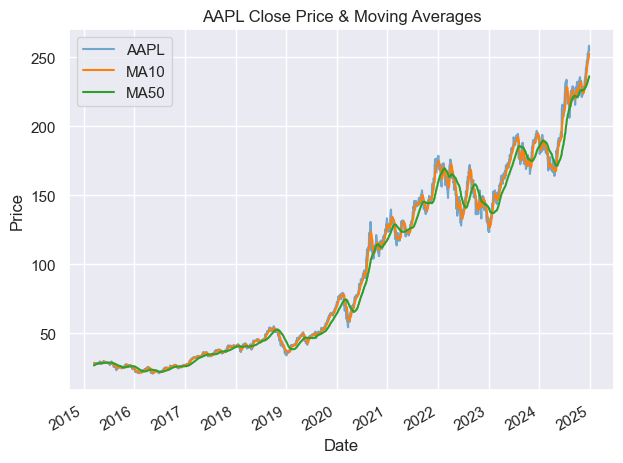

<Figure size 640x480 with 0 Axes>

In [17]:
# 12. Plot 4 powerful graphs

# Plot 1: Close Price with MA lines
plt.figure(figsize=(12, 5))
df['Close'].plot(label='Close', alpha=0.6)
df['MA10'].plot(label='MA10')
df['MA50'].plot(label='MA50')
plt.title(f'{ticker} Close Price & Moving Averages')
plt.xlabel("Date"); plt.ylabel("Price")
plt.legend(); plt.tight_layout()
plt.savefig("static/graphs/ma_plot.png")
plt.show()
plt.clf()

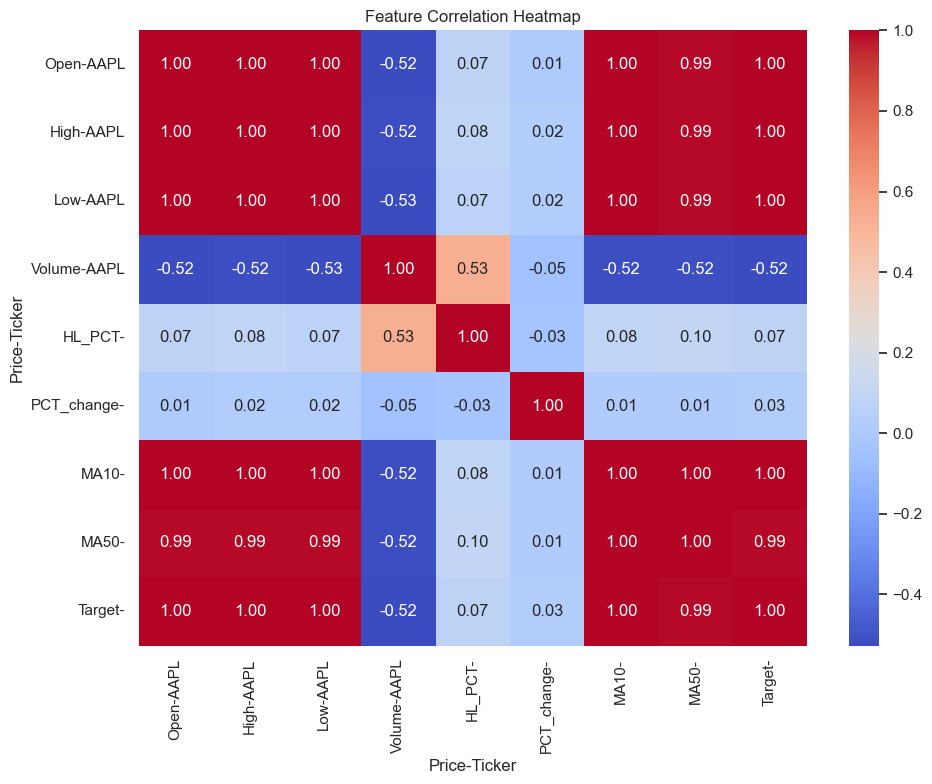

<Figure size 640x480 with 0 Axes>

In [18]:
# Plot 2: Correlation Heatmap
corr = df[features + ['Target']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.savefig("static/graphs/corr_heatmap.png")
plt.show()
plt.clf()

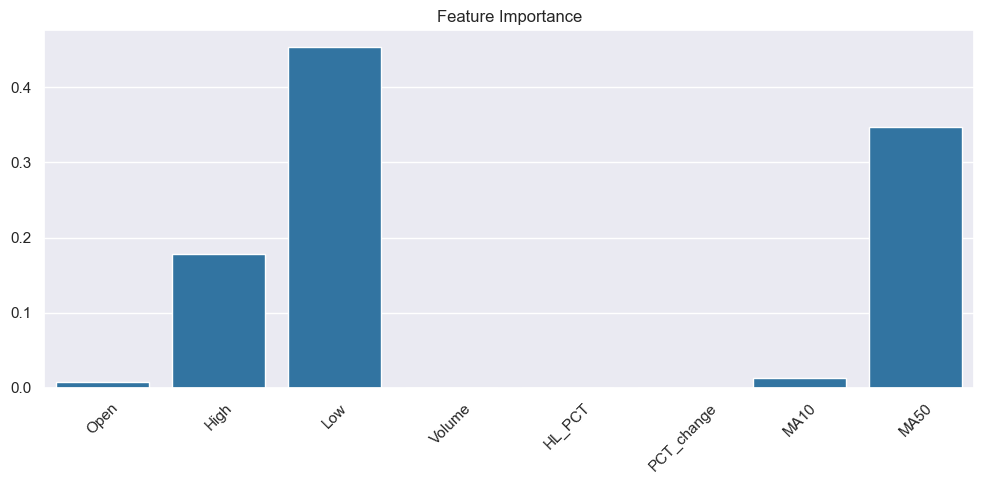

<Figure size 640x480 with 0 Axes>

In [19]:
# Plot 3: Feature Importances
importances = best_model.feature_importances_
plt.figure(figsize=(10, 5))
sns.barplot(x=features, y=importances)
plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("static/graphs/feature_importance.png")
plt.show()
plt.clf()

In [20]:
print("✅ Model and plots saved successfully.")

✅ Model and plots saved successfully.
